<a href="https://colab.research.google.com/github/623020514-5/multivariate/blob/main/Chapter4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multidimensional scalling**


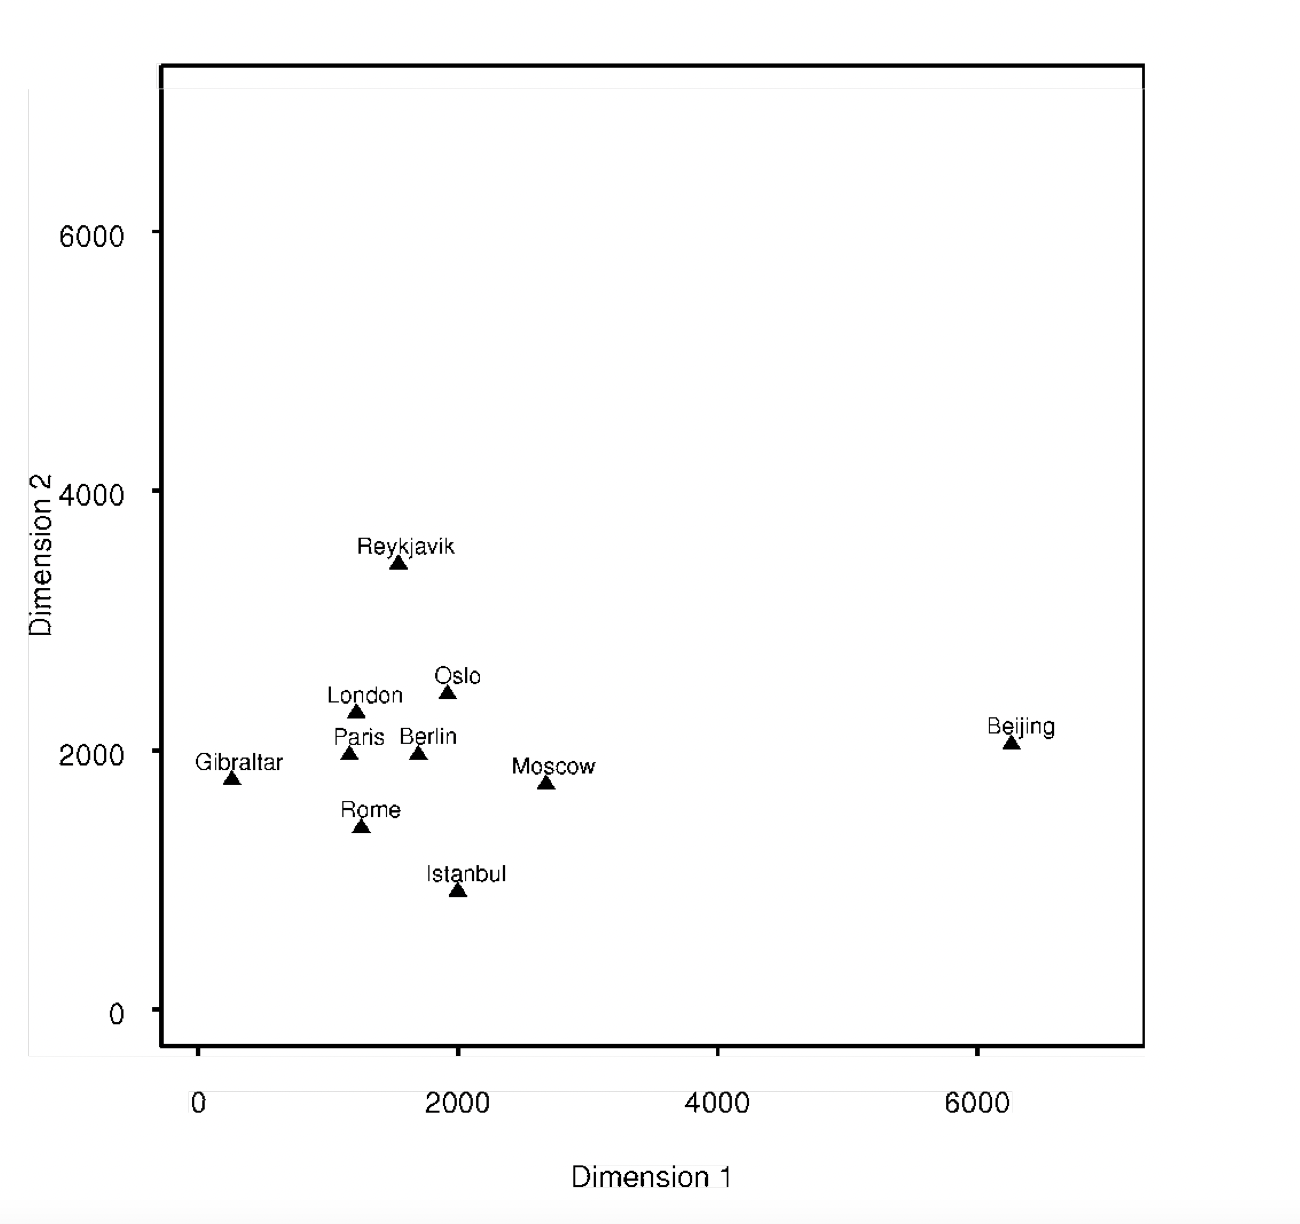

##วิธีทำ MDS

1.   จะเริ่มจากการคำนวณระยะห่างระหว่างจุดแต่ละจุด ว่ามีระยะห่างเท่าไหร่
2.   เลือกจุดๆนึงเป็นจุดตั้งต้น แล้วมาหาจุดที่มีระยะห่างน้อยไปถึงมาก
3.   โดยเมื่อนำระยะห่างมาเท่ากับจุดต้น ระยะห่างจากจุดอื่นๆต้องมีระยะห่างเท่าเดิมไม่เปลี่ยนแปลง

ข้อดีของมันคือ จะอยู่จุดเดิมเสมอ โดยที่ใช้ความสว่างเป็นตัวอ่านค่าเวลา plot graph

##**Example data Iris**

ลอง plot PCA เพื่อเปรียบเทียบกับ MDS

In [4]:
import pandas as pd 

In [7]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS

In [2]:
from sklearn.decomposition import PCA

In [3]:
pca = PCA(n_components=2)

In [8]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1]) #เอาทุกแถวยกเว้น column สุดท้าย

In [9]:
from matplotlib import pyplot as plt

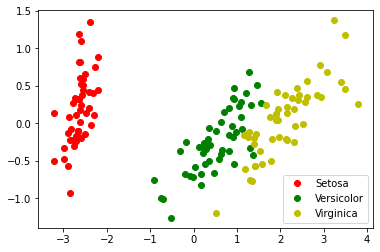

In [10]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label='Virginica')
plt.legend()
#plt.title('Iris'); #ตั้งชื่อกราฟโดยใช้ .title

###**MDS (Multidimensional Scaling)**

Distance คือ ระยะห่างระหว่างจุด

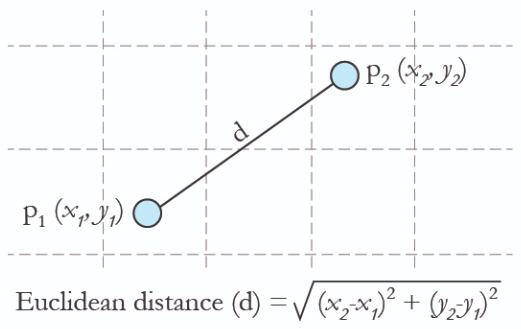

In [12]:
X1 = example_df.iloc[0,:-1].to_numpy() #เรียกจุดที่1 เอาเฉพาะ column ที่เป็นตัวเลขไม่เอา column ที่เป็นชื่อ
X1
#ค่าที่เทียบ 5.1	3.5	1.4	0.2

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [13]:
X2 = example_df.iloc[1,:-1].to_numpy() #จุดที่ 2 
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

คำนวณระยะห่างระหว่างจุดแบบ Euclidean distance

In [15]:
import numpy as np

In [17]:
dist = np.linalg.norm(X1-X2) #คำนวณระยะห่างระห่างจุด
dist
#ระยะห่างระหว่าง x1 and x2 เท่ากับ 0.5385164807134502

0.5385164807134502

In [16]:
(0.04+0.25)**(1/2) #เครื่องคิดเลข จะได้ค่าที่ใกล้เคียงกัน

0.5385164807134504

**Diatance Matrix**
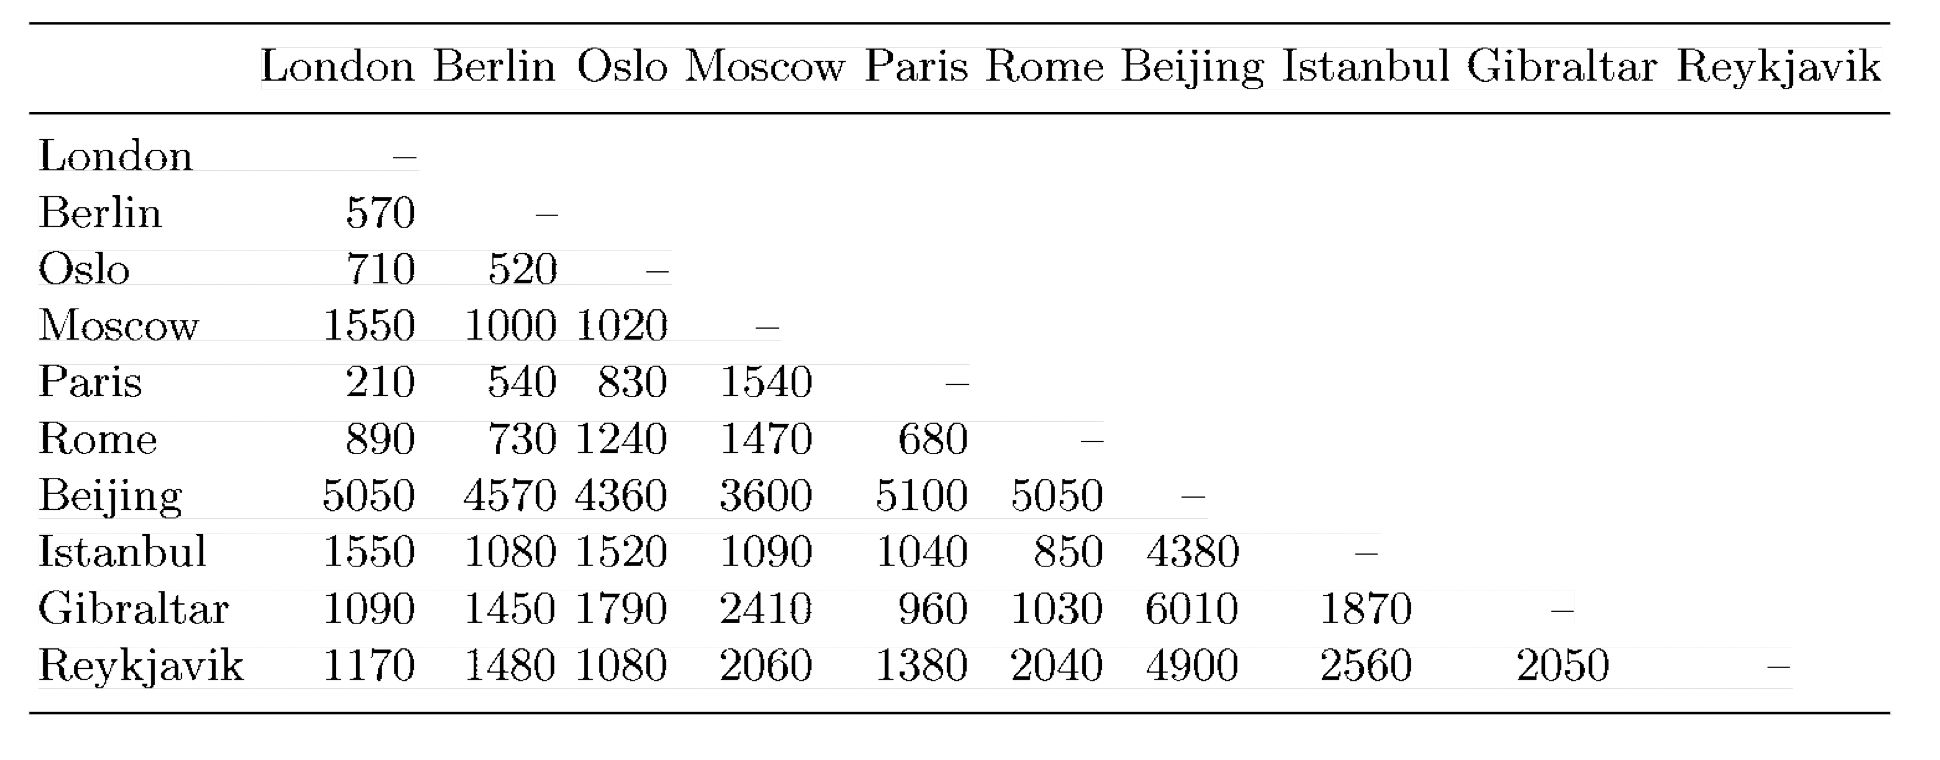

In [19]:
from sklearn.metrics import pairwise_distances #9ตั้งค่าให้นำใส่ pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

เราจะทำการ plot graph เพื่อเช็คระยะห่าง โดยเราจะสังเกตุจากความสว่างของกราฟในแต่ล่ะจุด ถ้ายิ่งมีสีแสดงว่าระยะห่างข้อจุดยิ่งน้อย กลับกัน เมื่อยิ่งมีสีสว่างจะมีระยะห่างกันมาก

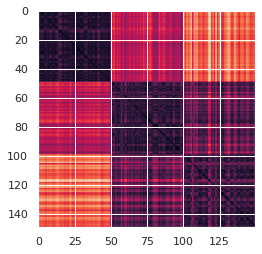

In [20]:
plt.imshow(dis_matrix)

#**MDS**

เราจะทำ MDS เพื่อลด Dimention และสามารถดูกราฟได้ง่ายขึ้น

In [21]:
from sklearn.manifold import MDS

In [22]:
mds = MDS(n_components=2)

In [23]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

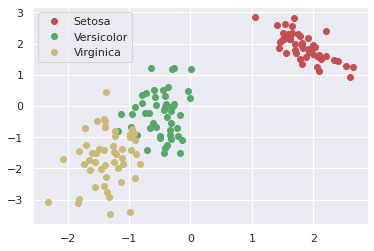

In [24]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()
 #ตั้งชื่อกราฟโดยใช้ .title

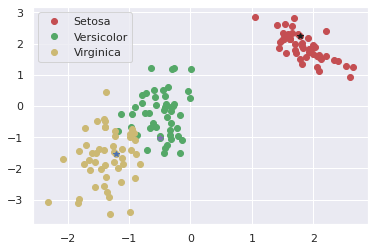

In [25]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k')
plt.plot(new_mds[56,0],new_mds[56,1],'*m')
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()
 #ตั้งชื่อกราฟโดยใช้ .title

### **How to Pre-computed Distance Matrix**

example 2

ขั้นตอนแรกเราความที่จะนำเข้า the standard imports

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

ต่อมาคือการสร้างข้อมูลสองมิติที่เราสามารถใช้เพื่อกำหนดความหลากหลาย ในรูปของคำว่า "HELLO"

In [28]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

เรียกใช้ฟังก์ชันและแสดงภาพข้อมูลที่เป็นผลลัพธ์

In [30]:
X = make_hello(1000)  #จำนวนจุดของฟังก์ชัน make_hello(_) มี 1000 จุด

In [31]:
X.shape #ตรวจสอบขนาดของ x 

(1000, 2)

แสดงภาพข้อมูลด้วยการ plot กราฟ

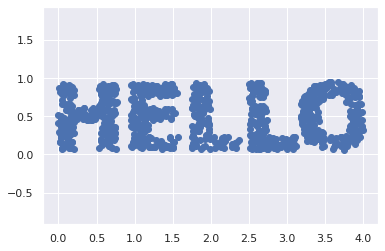

In [32]:
plt.scatter(X[:, 0], X[:, 1]) #จะเห็นว่าไม่มีระบุสี
plt.axis('equal'); #ทำให้สเกลแต่ละเเถวเท่ากัน

The output is two dimensional, and consists of points drawn in the shape of the word, "HELLO". This data form will help us to see visually what these algorithms are doing.

ฺBut we want to see color graph.

In [33]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
colorize 

{'c': array([4.65390215e-05, 5.38772018e-04, 2.61356305e-03, 5.41450286e-03,
        1.74530786e-02, 2.02463354e-02, 2.20884685e-02, 2.55434869e-02,
        2.75118489e-02, 2.78085221e-02, 3.32797689e-02, 3.61538763e-02,
        3.73264793e-02, 3.96952845e-02, 4.11379837e-02, 4.32443345e-02,
        4.52101464e-02, 4.54145791e-02, 4.64821596e-02, 4.68264429e-02,
        4.84830986e-02, 4.96161451e-02, 5.20076940e-02, 5.23778264e-02,
        5.47296590e-02, 5.75739545e-02, 5.87735546e-02, 6.18264661e-02,
        7.02094535e-02, 7.24407353e-02, 7.35627062e-02, 7.64643777e-02,
        7.65794720e-02, 7.67691073e-02, 7.88421510e-02, 8.02847911e-02,
        8.37364713e-02, 8.72935871e-02, 8.84942061e-02, 8.97035566e-02,
        9.45543442e-02, 9.48310146e-02, 9.67670556e-02, 9.98866485e-02,
        1.01545423e-01, 1.01676507e-01, 1.02568263e-01, 1.02758579e-01,
        1.03247628e-01, 1.06045242e-01, 1.08383970e-01, 1.14609710e-01,
        1.21854745e-01, 1.23823164e-01, 1.24596371e-01, 1.2

In [34]:
colorize['c'].shape # c ค่าในแนวแกน x

(1000,)

In [36]:
colorize['cmap']  #cmapมี 5 ตัว

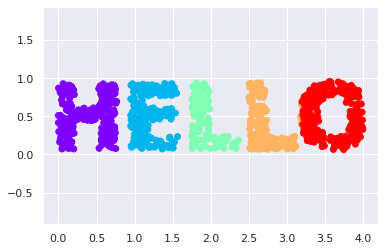

In [37]:
plt.scatter(X[:, 0], X[:, 1], **colorize) #Specify the graph color
plt.axis('equal');

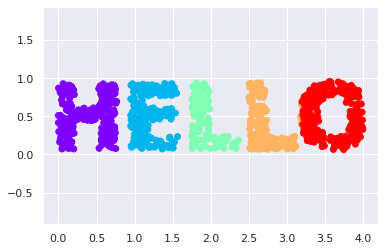

In [49]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

เมื่อพิจารณาจากข้อมูล เราจะเห็นว่าตัวเลือกของค่า x และ y ของชุดข้อมูลสามารถปรับขนาดย่อหรือหมุนข้อมูลได้และ "HELLO" หากเราใช้เมทริกซ์การหมุนเพื่อหมุนข้อมูลค่า x และ y จะเปลี่ยนไป แต่ข้อมูลยังคงเหมือนเดิม:

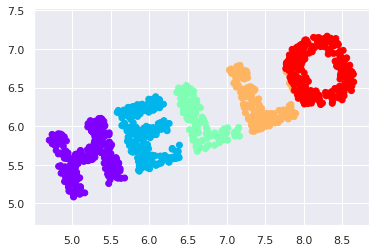

In [50]:
def rotate(X, angle): #เรียกใช้คำสั่งหมุน
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

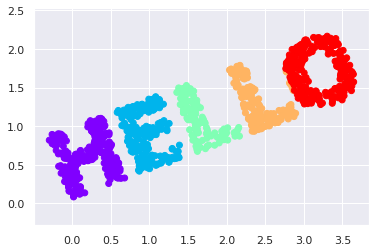

In [51]:
X2 = rotate(X, 20)  #หมุนไป 20 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize) #pltที่หมุนไปแล้วใส่สี
plt.axis('equal');

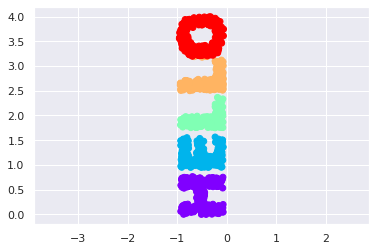

In [53]:
X2 = rotate(X, 90)  #หมุนไป 90 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize) #ใส่สี
plt.axis('equal');

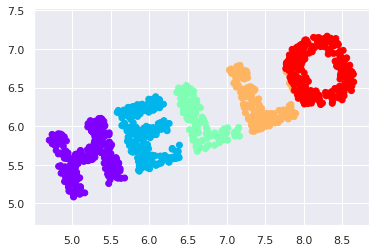

In [54]:
X2 = rotate(X, 20) + 5 #หมุนไป 20 องศา เลื่อนไปแนวแกนx 5 หน่วย  แกนy 5 หน่วย
plt.scatter(X2[:, 0], X2[:, 1], **colorize) #pltที่หมุนไปแล้วใส่สี
plt.axis('equal'); # ; ใส่เพื่อให้สวยงามไม่โชว์อะไร

##**MDS**

Multidimensional Scaling

In [55]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X) #เรียกฟังก์ชั่น pairwise_distances เพื่อหาระยะห่าง 
D.shape #ดูของ matrix

(1000, 1000)

จากการเรียกดูขนาด จะเห็นว่า N = 1,000 เมทริกซ์มีขนาด 1,000 × 1,000 

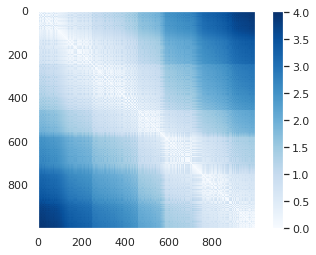

In [56]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

หากเราสร้างเมทริกซ์ข้อมูลโดยจะคำนวณระยะทางในทำนองเดียวกันสำหรับข้อมูลที่หมุนและแปลออกมาจะเห็นว่ามันเหมือนกัน:

In [66]:
D2 = pairwise_distances(X2) #X2 คือ x ที่หมุนเเล้ว
np.allclose(D, D2)

True

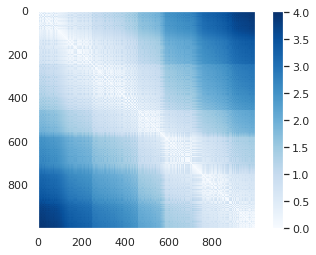

In [58]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();#สีจะเป็นตัวระบุความห่างระหว่างจุดทั้งสอง
#จุดที่ 1 กับจุดที่ 1000 ห่างกันประมาณเกือบ 4 

In [67]:
from sklearn.manifold import MDS

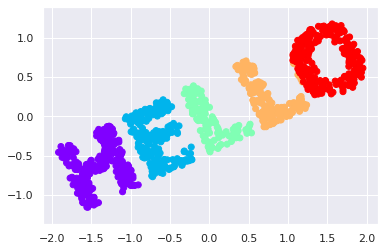

In [61]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) 
out = model.fit_transform(D) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

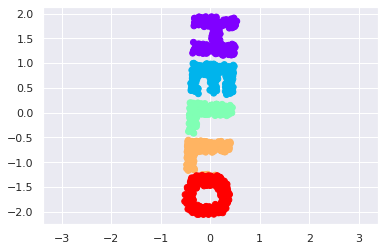

In [62]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [68]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

เราสามารถขอให้ตัวประมาณค่า MDS ป้อนข้อมูลสามมิติ

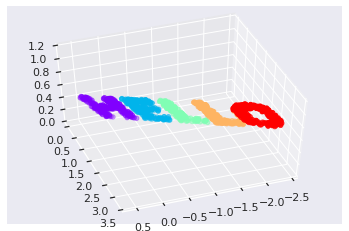

In [69]:
from mpl_toolkits import mplot3d 
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

#**Quiz4**

ทำลองทำข้อมูล PCA กับข้อมูล

```
X
```
แล้ว plotgraph และดูว่าผลการกระจายข้อมูลเปลี่ยนไปหรือไม่


In [ ]:
from sklearn.decomposition import  PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X_pca = pca.fit_transform(X)

No handles with labels found to put in legend.


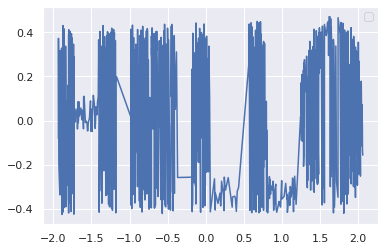

In [ ]:
plt.plot(X_pca[:,0],X_pca[:,1])
plt.legend()

In [43]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [39]:
pca = PCA(n_components=2)

In [40]:
new_pca = pca.fit_transform(X)

In [41]:
new_pca.shape

(1000, 2)

In [42]:
new_pca

array([[-1.9337476 , -0.08154573],
       [-1.93360269,  0.01301875],
       [-1.93284845,  0.37256384],
       ...,
       [ 2.05704731, -0.03171414],
       [ 2.05815725, -0.1327384 ],
       [ 2.06207964, -0.15679672]])

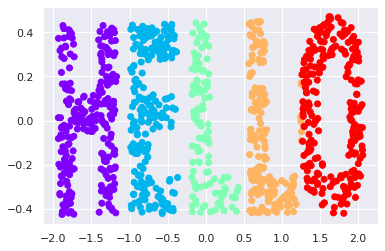

In [44]:
plt.scatter(new_pca[:,0],new_pca[:,1],**colorize)

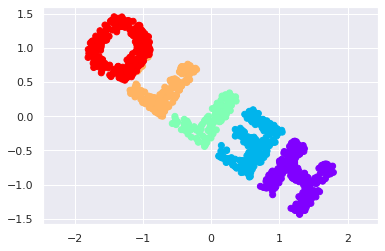

In [63]:
model = MDS(n_components=2, dissimilarity='precomputed') 
out = model.fit_transform(D2) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

ในกรณีของ MDS ปริมาณที่เก็บรักษาไว้คือระยะห่างระหว่างจุดทุกคู่

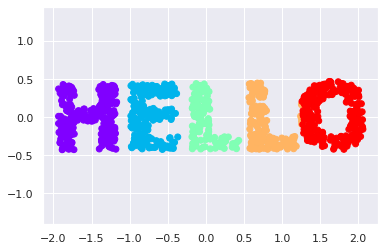

In [64]:
model = PCA(n_components=2) 
out = model.fit_transform(X2) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

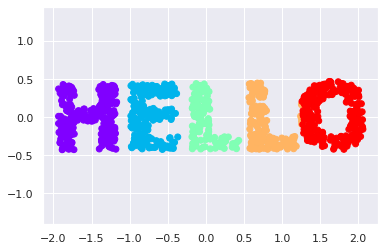

In [65]:
model = PCA(n_components=2) 
out = model.fit_transform(out) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

เราจะเห็นว่ากราฟจะมีลักษณะคล้ายเดิม เพราะ ข้อมูล มี dimantion เท่ากับ 2